In [23]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [13]:
df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")
df_dummies = pd.get_dummies(df)
df_copy = df_dummies.copy()
df_copy.head()

del df_copy['duration']
del df_copy['y_no']

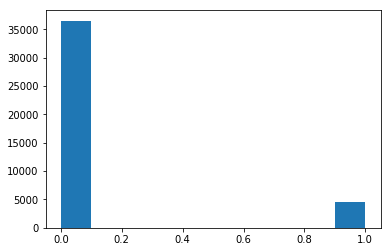

In [3]:
plt.hist(df_copy['y_yes'])
plt.show()

In [29]:
clf = ExtraTreesClassifier(n_estimators = 100)
clf.fit(df_copy[:], df_copy['y_yes'])

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
score = cross_val_score(clf, df_copy[:], df_copy['y_yes'], cv=10, n_jobs=-1)
print('Average accuracy: {} %'.format(np.mean(score)*100))

Average accuracy: 94.64318093305039 %


In [25]:
y_pred = clf.predict(df_copy[:])
cnf_matrix = confusion_matrix(df_copy['y_yes'], y_pred)
print(cnf_matrix)

[[36548     0]
 [    0  4640]]


In [44]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

[62 61  7  2  8  4  0  1  6 60  5 50 49 52 42 59  3 43 38 55 36 53 31 14
 56  9 22 10 28 57 23 54 48 39 58 41 34 18 30 27 44 33 17 21 25 32 16 13
 51 47 15 45 26 19 11 12 46 20 37 40 24 29 35]
